In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
le = LabelEncoder()

In [5]:
df['species']=le.fit_transform(df['species'])

In [6]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [7]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


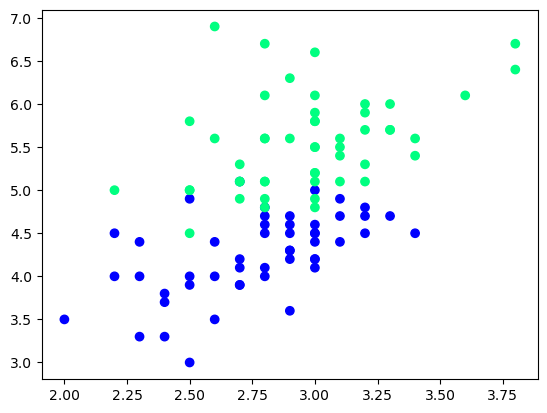

In [8]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [27]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10) # For Training
df_val = df.iloc[60:80,:].sample(5) # For Calculating accuracy
df_test = df.iloc[80:,:].sample(5) # For Prediction

In [28]:
# Training on training datasets and test on df_val
# I am creating arrays of df_val

X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

# Case 1 - Bagging

In [29]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
103,2.9,5.6,2
136,3.4,5.6,2
113,2.5,5.0,2
78,2.9,4.5,1
117,3.8,6.7,2
117,3.8,6.7,2
103,2.9,5.6,2
136,3.4,5.6,2


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [31]:
dt_beg1 = DecisionTreeClassifier()

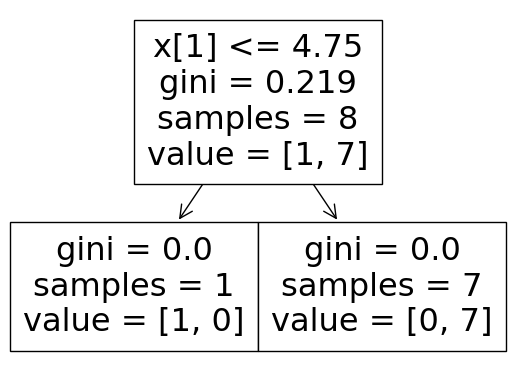

0.8


C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [32]:
evaluate(dt_beg1,X,y)

In [33]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
148,3.4,5.4,2
117,3.8,6.7,2
103,2.9,5.6,2
136,3.4,5.6,2
148,3.4,5.4,2
120,3.2,5.7,2
120,3.2,5.7,2
136,3.4,5.6,2


In [34]:
dt_beg2 = DecisionTreeClassifier()

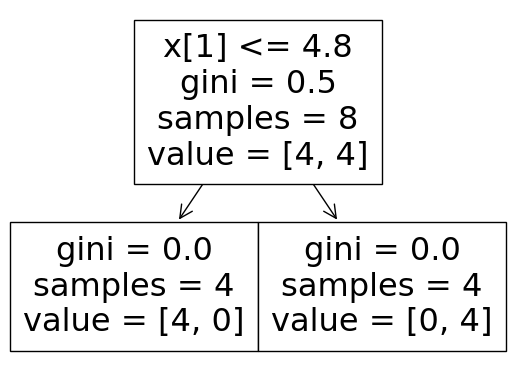

0.8


C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [47]:
evaluate(dt_beg2,X,y)

In [36]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
93,2.3,3.3,1
93,2.3,3.3,1
148,3.4,5.4,2
78,2.9,4.5,1
114,2.8,5.1,2
117,3.8,6.7,2
93,2.3,3.3,1
120,3.2,5.7,2


In [37]:
dt_beg3 = DecisionTreeClassifier()

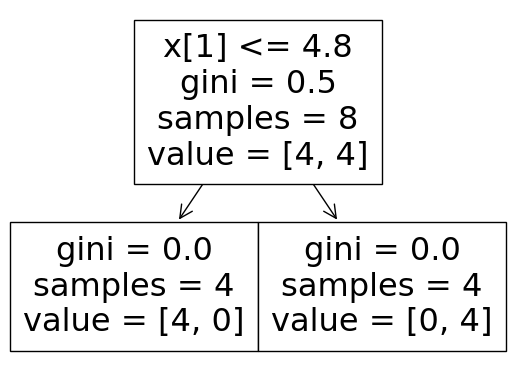

0.8


C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
evaluate(dt_beg3,X,y)

In [39]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# Aggrigation/Testing/Prediction

In [40]:
df_test

,sepal_width,petal_length,species
55,2.8,4.5,1
70,3.2,4.8,1
134,2.6,5.6,2
89,2.5,4.0,1
65,3.1,4.4,1


In [49]:
print('Predictor 1',dt_beg1.predict(np.array([2.6,5.6]).reshape(1,2)))
print('Predictor 2',dt_beg2.predict(np.array([2.6,5.6]).reshape(1,2)))
print('Predictor 3',dt_beg3.predict(np.array([2.6,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
